In [38]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of y_train:  (60000,)
Shape of X_test:  (10000, 28, 28)
Shape of y_test:  (10000,)


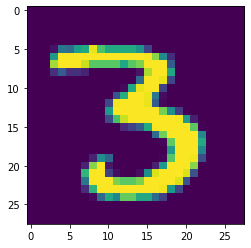

3

In [5]:
plt.imshow(X_train[12])
plt.show()
y_train[12]

In [6]:
class Network:
    
    # initialization of neural network
    def __init__(self, layers, alpha, epochs):
        self.layers = layers
        self.alpha = alpha
        self.epochs = epochs
        
        input_layer = layers[0]
        hidden_layer1 = layers[1]
        hidden_layer2 = layers[2]
        output_layer = layers[3]
        
        self.params = {
            'w1':np.random.randn(hidden_layer1, input_layer) * np.sqrt(1./hidden_layer1),
            'w2':np.random.randn(hidden_layer2, hidden_layer1) * np.sqrt(1./hidden_layer2),
            'w3':np.random.randn(output_layer, hidden_layer2) * np.sqrt(1./output_layer)
        }
    
    # implementation of forward-propagation algorithm
    def forward_propagation(self, x_train):
        #params = self.params
        
        self.params['a0'] = x_train
        
        # First Hideen Layer
        self.params['z1'] = np.dot(self.params['w1'], x_train)
        self.params['a1'] = self.sigmoid(self.params['z1'])
        
        # Second Hidden Layer
        self.params['z2'] = np.dot(self.params['w2'], self.params['a1'])
        self.params['a2'] = self.sigmoid(self.params['z2'])
        
        # Output Layer
        self.params['z3'] = np.dot(self.params['w3'], self.params['a2'])
        self.params['a3'] = self.softmax(self.params['z3'])
        
        return self.params['a3']
    
    # implementation of back-propagation algorithm
    def back_propagation(self, y_train, y_hat):
        #params = self.params
        
        # Change in W3 matrix
        error = (2 / y_hat.shape[0]) * (y_hat - y_train) * self.softmax(self.params['z3'], derivative=True)
        delta_w = np.outer(error, self.params['a2'])
        self.params['w3'] = self.params['w3'] - (self.alpha*delta_w) 
        
        # Change in W2 matrix
        error = np.dot(self.params['w3'].T, error) * self.sigmoid(self.params['z2'], derivative=True)
        delta_w = np.outer(error, self.params['a1'])
        self.params['w2'] = self.params['w2'] - (self.alpha*delta_w)
        
        # Change in W1 matrix
        error = np.dot(self.params['w2'].T, error) * self.sigmoid(self.params['z1'], derivative=True)
        delta_w = np.outer(error, self.params['a0'])
        self.params['w1'] = self.params['w1'] - (self.alpha*delta_w)
    
    # sigmoid function
    def sigmoid(self, z, derivative = False):
        if derivative:
            return np.exp(z)/((1 + np.exp(z))**2)
        
        return 1/(1 + np.exp(-z))
        
    # softmax function
    def softmax(self, z, derivative = False):
        exp = np.exp(z - z.max())
        if derivative:
            return (exp/np.sum(exp, axis=0)) * (1 - (exp/np.sum(exp, axis=0)))
        
        return exp/np.sum(exp, axis=0)
    
    # training the network (1 epoch)
    def train_util(self, x_train, y_train):
        for x,y in zip(x_train,y_train):
            x = np.asfarray(x.reshape((784,1)))
            x = ((x / 255.0) * 0.99) + 0.01
            output = np.zeros(10, dtype=int) + 0.01
            output[int(y)] = 0.99
            output = output.reshape((10,1))
            prediction = self.forward_propagation(x)
            self.back_propagation(output, prediction)
            
    def train(self, x_train, y_train):
        for i in range(self.epochs):
            start = time.time()
            self.train_util(x_train, y_train)
            acc = self.accuracy(x_train, y_train)
            print('Epoch->',i,'---------------','time->',time.time()-start,'---------------','Accuracy->',round(acc*100, 2),'%')
            
    # computing accuracy
    def accuracy(self, X, Y):
        pred = []
        for x,y in zip(X,Y):
            x = np.asfarray(x.reshape((784,1)))
            x = ((x / 255.0) * 0.99) + 0.01
            output = np.zeros(10, dtype=int) + 0.01
            output[int(y)] = 0.99
            output = output.reshape((10,1))
            prediction = self.forward_propagation(x)
            pred.append(np.argmax(output) == np.argmax(prediction))
        return np.mean(pred)

In [7]:
dnn = Network(layers=[784,128,64,10], alpha=0.001, epochs=100)

In [8]:
dnn.train(X_train, y_train)

Epoch-> 0 --------------- time-> 50.68442630767822 --------------- Accuracy-> 25.26 %
Epoch-> 1 --------------- time-> 52.871421337127686 --------------- Accuracy-> 35.46 %
Epoch-> 2 --------------- time-> 52.55912780761719 --------------- Accuracy-> 45.78 %
Epoch-> 3 --------------- time-> 53.39237976074219 --------------- Accuracy-> 48.2 %
Epoch-> 4 --------------- time-> 54.80769324302673 --------------- Accuracy-> 49.86 %
Epoch-> 5 --------------- time-> 55.155203342437744 --------------- Accuracy-> 52.13 %
Epoch-> 6 --------------- time-> 53.87336850166321 --------------- Accuracy-> 54.15 %
Epoch-> 7 --------------- time-> 60.75947618484497 --------------- Accuracy-> 55.94 %
Epoch-> 8 --------------- time-> 56.29981064796448 --------------- Accuracy-> 57.65 %
Epoch-> 9 --------------- time-> 55.97897958755493 --------------- Accuracy-> 59.42 %
Epoch-> 10 --------------- time-> 65.04689621925354 --------------- Accuracy-> 60.98 %
Epoch-> 11 --------------- time-> 73.75983881950378 

Epoch-> 95 --------------- time-> 50.82987833023071 --------------- Accuracy-> 87.96 %
Epoch-> 96 --------------- time-> 50.07850193977356 --------------- Accuracy-> 87.92 %
Epoch-> 97 --------------- time-> 51.53713631629944 --------------- Accuracy-> 87.9 %
Epoch-> 98 --------------- time-> 50.12014865875244 --------------- Accuracy-> 87.83 %
Epoch-> 99 --------------- time-> 50.07580304145813 --------------- Accuracy-> 87.76 %


In [27]:
print(f"Test accuracy-> {round(dnn.accuracy(X_test, y_test)*100,2)}%")

Test accuracy-> 88.35%


In [28]:
y_pred = []
for x,y in zip(X_test,y_test):
    x = np.asfarray(x.reshape((784,1)))
    x = ((x / 255.0) * 0.99) + 0.01
    output = np.zeros(10, dtype=int) + 0.01
    output[int(y)] = 0.99
    output = output.reshape((10,1))
    prediction = dnn.forward_propagation(x)
    y_pred.append(prediction)
y_pred = np.array(y_pred)

In [29]:
y_pred.shape

(10000, 10, 1)

In [30]:
y_pred[0]

array([[1.78150235e-04],
       [3.08896969e-03],
       [1.75910071e-03],
       [7.36917002e-03],
       [5.25160959e-03],
       [2.15992300e-03],
       [1.16870718e-04],
       [9.44502484e-01],
       [2.37968756e-03],
       [3.31940350e-02]])

In [31]:
y_pred = np.reshape(y_pred, [y_pred.shape[0], y_pred.shape[1]])

In [32]:
y_pred[0]

array([1.78150235e-04, 3.08896969e-03, 1.75910071e-03, 7.36917002e-03,
       5.25160959e-03, 2.15992300e-03, 1.16870718e-04, 9.44502484e-01,
       2.37968756e-03, 3.31940350e-02])

In [33]:
y_pred = np.argmax(y_pred, axis=1)
y_pred[0]

7

Text(69.0, 0.5, 'Actual')

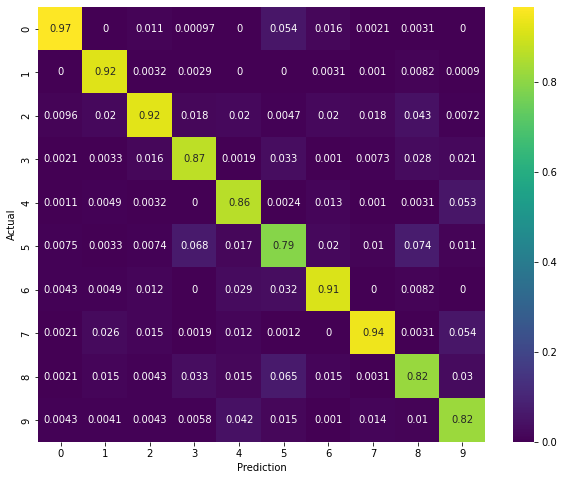

In [42]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred, normalize='pred')
fig = plt.figure(figsize=(10,8))
sns.heatmap(mat, annot=True, cmap='viridis')
plt.xlabel('Prediction')
plt.ylabel('Actual')

In [51]:
import pickle
pickle.dump(dnn, open('custom_model.pkl', 'wb'))

In [56]:
model = pickle.load(open('custom_model.pkl', 'rb'))

In [60]:
round(model.accuracy(X_train, y_train)*100,2)

87.76

In [61]:
round(model.accuracy(X_test, y_test)*100,2)

88.35